In [1]:
import numpy as np
from input_data import *
from Layers import *
from NN_own import NN
from sklearn.model_selection import train_test_split
from cost_func import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def mse(y, y_pred):
    return np.mean((y - y_pred)**2)

def r2_score(y, y_pred):
    mean_y = np.mean(y)
    ss_total = np.sum((y - mean_y)**2)
    ss_residual = np.sum((y - y_pred)**2)
    
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [3]:
# Create code
n = 40         # n x n number of data points
sigma2 = 0.01   # irreducible error
sigma = np.sqrt(sigma2)

x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
noise = np.random.normal(0, sigma, int(n*n))

# create mesh and unravel
x, y = np.meshgrid(x, y)
x = np.ravel(x)
y = np.ravel(y)

# observed data
z = FrankeFunction(x, y) + noise

x.ravel()
y.ravel()

X = np.c_[x,y]

In [4]:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

# X_train_scaled = (X_train-np.mean(X_train))/sigma
# X_test_scaled = (X_test-np.mean(X_train))/sigma

# z_train_scaled=(z_train-np.mean(z_train))/sigma
# z_test_scaled=(z_test-np.mean(z_train))/sigma


# X_train, X_test, z_train, z_test = X_train_scaled, X_test_scaled, z_train_scaled,z_test_scaled

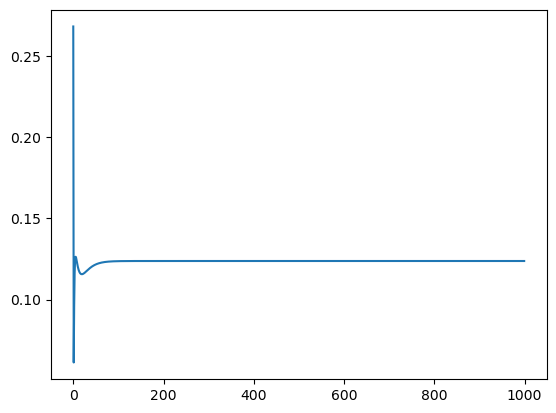

In [6]:
#Neural network
####################
neurons = [3,3,3,1]
eta = 0.1


# Create the neural network
model= NN(X_train,z_train,neurons, act_func_h = 'sigmoid')
model.train(batch_size = 20, lmb =0.1)


z_pred= model.predict(X_test)
z_test.reshape(-1,1)

mse_trained = mean_squared_error(z_pred, z_test)
mse_test = mean_squared_error(z_pred,z_train)
error = model.errors

plt.plot(np.arange(len(error)),error)

In [ ]:
'''Calculating accuracies over different learning rates and L2 parameters'''

# Defining model parameters
etas = np.logspace(-6,-1,10)
l2_lambdas = np.logspace(-6,-1,10)
n_iterations = 1000
costerror = np.zeros((len(etas), len(l2_lambdas)))
mse_test = np.zeros((len(etas), len(l2_lambdas)))

for i,eta in enumerate(etas):
    for j,lam in enumerate(l2_lambdas):
        model= NN(X_train,z_train,neurons, act_func_h = 'sigmoid')
        model.train(batch_size = 20, lmb = lam, learning_rate = eta)
        z_pred= model.predict(X_test)
        
        error = model.errors[-1]
        costerror[i,j] = error
        mse_test=mse(z_pred, z_test)
        
        
        

In [ ]:
# Creating a Dataframe with Accuracy-data and plotting a heatmap of the results



# # Creating the dataframe

formatted_etas = ['{:e}'.format(i) for i in etas]
formatted_lmd = ['{:e}'.format(i) for i in l2_lambdas]

last_epoch_error = pd.DataFrame(costerror, index = formatted_etas, columns = formatted_lmd)
df_mse = pd.DataFrame(mse_test, index = formatted_etas, columns = formatted_lmd)

# # Setting font-family for Matplotlib to "Times New Roman" to match Overleaf' s Latex font.
sns.set(font='Times New Roman', style='whitegrid', font_scale=1.2)

# # Plot
title = "Heatmap of NN mse for different {eta} and {lambda_2} values"


# # Adjusting the figure size and annot font size
plt.figure(figsize=(10, 10))
ax = sns.heatmap(last_epoch_error, annot=True, cmap="crest",fmt=".3f", linewidths=0.5, annot_kws={"size": 12}, cbar_kws={'label': 'MSE for the last epoch'})

# Set x-axis and y-axis label font sizes
ax.set_xlabel("{lambda_2}, Regularization Parameter", fontsize=12)  # Add your X-axis label and adjust font size
ax.set_ylabel("{eta}, Learning Rate", fontsize=12)  # Add your Y-axis label and adjust font size


# Adjust x and y tick font size
ax.tick_params(axis='x', labelsize=10)  # Adjust x-axis tick font size
ax.tick_params(axis='y', labelsize=10)  # Adjust y-axis tick font size

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.title(title, fontsize=16)

# Adjust colorbar font size
cax = ax.collections[0].colorbar.ax
cax.set_ylabel('Cost error', fontsize=12) 
cax.tick_params(labelsize=10)  # Adjust colorbar font size

plt.show()

In [ ]:
title = "Heatmap of NN mse for different {eta} and {lambda_2} values"


 # # Adjusting the figure size and annot font size
plt.figure(figsize=(10, 10))
ax = sns.heatmap(df_mse, annot=True, cmap="crest",fmt=".3f", linewidths=0.5, annot_kws={"size": 12}, cbar_kws={'label': 'MSE for the last epoch'})


 # Set x-axis and y-axis label font sizes
ax.set_xlabel("{lambda_2}, Regularization Parameter", fontsize=12)  # Add your X-axis label and adjust font size
ax.set_ylabel("{eta}, Learning Rate", fontsize=12)  # Add your Y-axis label and adjust font size


 # Adjust x and y tick font size
ax.tick_params(axis='x', labelsize=10)  # Adjust x-axis tick font size
ax.tick_params(axis='y', labelsize=10)  # Adjust y-axis tick font size

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.title(title, fontsize=16)

# Adjust colorbar font size
cax = ax.collections[0].colorbar.ax
cax.set_ylabel('Mse', fontsize=12) 
cax.tick_params(labelsize=10)  # Adjust colorbar font size

plt.show()

In [ ]:
#Checking different lamdas for best eta found in previus heatmap.

eta = 0.1
etas = np.logspace(-6,-1,10)
l2_lambdas = np.logspace(-6,-1,10)
costerror = np.zeros(len(l2_lambdas))
formatted_lmd = ['{:.2e}'.format(i) for i in l2_lambdas]
for j,lam in enumerate(l2_lambdas):
    model= NN(X_train,z_train,neurons, act_func_h = 'sigmoid')
    model.train(batch_size = 20, lmb = lam, learning_rate = eta,epochs = 200)
    z_pred= model.predict(X_test)
    
    error = model.errors
    s = error[:200]
    # formatted_etas = ['{:e}'.format(i) for i in etas]
    labels = formatted_lmd[j]
    #costerror[j] = error
    plt.plot(np.arange(len(s[:50])),s[:50],label=labels)
    plt.legend(loc='upper right')
    
    